# Simulated Annealing

Gradient descent 방법을 이용하면 local minimum/maximum을 찾을 수 있으나 퍼텐셜이 복잡한 형태라면 global minimum/maximum을 찾고자 한다면 거의 항상 실패할 것입니다. 예를 들어 아래와 같은 퍼텐셜을 생각해봅시다. 이러한 퍼텐셜에서 경사하강법을 적용하면 국지적인 최소에 갖히게 됩니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2-np.cos(10*x)+1

z=np.linspace(-2,2,100)

plt.plot(z,f(z))
plt.plot(0,f(0),'o')

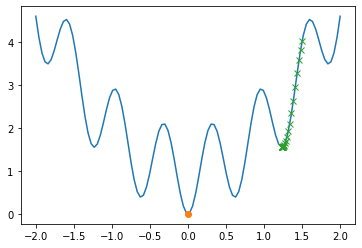

In [2]:
def gd(gam,x):
    dx = 0.001
    df = (f(x+dx)-f(x))/dx
    return x-gam*df

x0=1.5
x = [x0]
y = [f(x0)]
gam=0.002

for i in range(30):
    x0=gd(gam,x0)
    x=np.append(x,x0)
    y=np.append(y,f(x0))

plt.plot(z,f(z))
plt.plot(0,f(0),'o')
plt.plot(x,y,'x')

이를 극복하기 위한 방법 중 하나가 simulated annealing(모의담금질)입니다. 기본적인 아이디어는 통계역학과 몬테카를로 시뮬레이션에서 시작합니다.

바닥상태의 에너지를 $E=0$이라고 합시다. 그리고 통계역학에 따르면 에너지가 $E_i$인 상태의 확률은 $P_i=\frac{1}{Z} e^{-\beta E_i}$입니다. 따라서 자연스럽게 에너지가 낮은 상태를 선호하게 되고 메트로폴리스 알고리즘을 이용하면 에너지가 낮은 상태에서 높은 상태로 전이할 확률은 $e^{-\beta \Delta E}$로 주어집니다. 

여기까지는 단순한 몬테카를로 시뮬레이션과 동일합니다. 관건은 온도입니다. 만약 온도가 높아지면 ($\beta$ 감소) 에너지가 높은 상태로 전이할 확률이 높아집니다. 다르게 표현하면 온도가 높아지면 에너지 차이에 덜 민감해집니다. 반면 온도가 낮아지면 에너지가 낮은 상태를 선호하는 정도가 커집니다. 비유적으로 설명하면 온도가 높아지면 에너지 굴곡이 상대적으로 작아지는 효과를 불러옵니다.

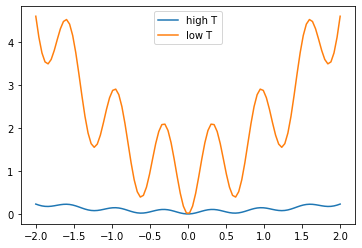

In [13]:
plt.plot(z,f(z)/20,label='high T')
plt.plot(z,f(z),label='low T')
plt.legend()

따라서 온도를 고온에서 천천히 낮추면서 몬테카를로 방법을 이용해서 최소값을 찾으면 자연스럽게 global 최소값에 도달할 확률이 높습니다. 이를 simulated annealing이라고 합니다.

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt 

def f(x): 
    return x**2-np.cos(10*x)+1 # 에너지

mcs=10
def mc(b,x):
    for t in range(mcs):
        newx=x+random.gauss(0,0.2) # 가우시안 랜덤 variable
        DE=f(newx)-f(x)
        if DE<0:
            x=newx # 상태 바꾸기
        elif random.random()<np.exp(-b*DE):
            x=newx
    return x

x, Tmax=1.5, 10
traj=[x]
y = [f(x)]
co = [0]

for i in range(50):
    T=Tmax*np.exp(-i/10) # cooling  
    x=mc(1/T,x)
    
    traj=np.append(traj,x)
    y=np.append(y,f(x))
    co=np.append(co,i+1)

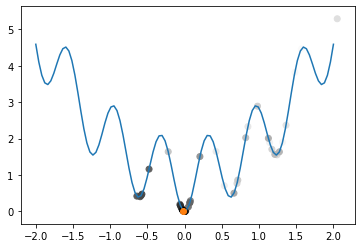

In [4]:
plt.plot(z,f(z))
plt.scatter(traj,y,c=co,cmap='Greys')
plt.plot(traj[-1],y[-1],'o')